<a href="https://colab.research.google.com/github/sosarodrigox/grupo13_pp2/blob/main/ProyectoIntegrador_Grupo13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instituto Superior Politécnico Córdoba

## Tecnicatura Superior en Ciencia de Datos e Inteligencia Artificial

### Cátedra: Práctica Profesionalizante II

**Docente**: Facundo Oliva Cuneo

**Año**: 2024
  
**Trabajo Práctico Integrador**

## Grupo 13
### Integrantes:

- **Ingaramo, Ma. Eugenia**  
  [eugenia.ingaramo@gmail.com](mailto:eugenia.ingaramo@gmail.com)
- **Lonardi, Pablo**  
  [lonardipablo@gmail.com](mailto:lonardipablo@gmail.com)
- **Margheim, Carolina**  
  [caro08.m@gmail.com](mailto:caro08.m@gmail.com)
- **Sosa, Rodrigo**  
  [sosarodrigox@gmail.com](mailto:sosarodrigox@gmail.com)
- **Zenere, Mauricio**  
  [zeneremauricio@gmail.com](mailto:zeneremauricio@gmail.com)

### CRISP-DM 1. Compresión del negocio:

Actualmente, la *Biblioteca Popular* lleva a cabo la gestión de libros de **manera manual**; esto incluye:

- La adquisición, catalogación y clasificación de libros.
- El etiquetado y la digitalización.
- El préstamo y devolución de libros, así como la gestión de multas y renovaciones.
- La asistencia al usuario.
- La programación de eventos y actividades para la promoción de la lectura, la alfabetización y el compromiso comunitario.
- La gestión de colecciones para la rotación de libros obsoletos o poco utilizados y la identificación de aquellos de interés de los usuarios.
- La preservación y conservación de libros para garantizar su durabilidad y accesibilidad a largo plazo.
- La gestión de sistemas de gestión de bibliotecas, bases de datos en línea, recursos electrónicos y otros aspectos tecnológicos relacionados con la operación de la biblioteca.

La recomendación de libros, por su parte, se ve limitada y condicionada por el personal de la biblioteca (sus conocimientos de materiales de lectura e intereses propios).

La consulta de disponibilidad y estado de préstamo de libros requiere que los usuarios visiten físicamente la biblioteca o realicen consultas telefónicas, generando demoras y mayor carga administrativa.

Debido a la falta de un registro exhaustivo de la demanda, la adquisición de libros no está completamente alineada con las necesidades e intereses de los usuarios.

Además, la disposición de recursos y servicios en la biblioteca se basa en suposiciones generales y no en datos concretos sobre el uso y las preferencias de los usuarios.

### Objetivo del Negocio

La biblioteca busca mejorar la eficiencia operativa así como la experiencia de usuario. Se identifican los siguientes objetivos del negocio:

- Optimizar la experiencia del usuario y aumentar su nivel de satisfacción con el servicio.
- Mejorar la eficiencia en la gestión de recursos.
- Optimizar la utilización de recursos y servicios.
- Reducir la carga de trabajo manual del personal de la biblioteca en pos de la eficiencia operativa.

Lograr estos objetivos tendría un impacto positivo tanto en los usuarios de la biblioteca como en la eficiencia operativa de la institución, lo que contribuiría a su relevancia y sostenibilidad a largo plazo.

Definir claramente los objetivos del sistema de recomendación desde una perspectiva de negocio o servicio. Identificar los beneficios esperados del sistema para los usuarios y la plataforma que lo aloje.

**Objetivo claro:** Automatizar la recomendación y consulta de existencia de libros, predecir demanda y analizar patrones de uso.  
**Impacto:** Mejora de servicios y gestión eficiente de recursos.

### Objetivos de Minería de Datos

Los objetivos del presente proyecto abarcan:

- Implementar un sistema automatizado de recomendación de libros y consulta de disponibilidad y estado de préstamo para mejorar la experiencia de los usuarios de la biblioteca, facilitando el acceso a los materiales y reduciendo el tiempo dedicado a la búsqueda.
- Utilizar análisis de datos para predecir la demanda de libros y ajustar las adquisiciones de manera más precisa, optimizando así la gestión de recursos y evitando la escasez o el exceso de inventario.
- Analizar patrones de uso de los libros y servicios de la biblioteca para identificar oportunidades de mejora en la disposición de recursos y servicios, aumentando así su utilización y maximizando el valor para los usuarios.

Esto permitiría reducir la carga de trabajo manual del personal de la biblioteca en tareas como la consulta de disponibilidad y el seguimiento de préstamos, permitiendo que se centren en actividades de valor añadido, como la asistencia al usuario y la programación de eventos.

Al proporcionar recomendaciones personalizadas, acceso rápido a la información de disponibilidad y un flujo de préstamo eficiente, se pretende aumentar la satisfacción general del cliente, lo que podría traducirse en una mayor fidelidad y participación de los usuarios.

Con la implementación de estas medidas, se espera:

- Reducir los costos asociados con el exceso de inventario o la necesidad de adquirir libros de manera urgente para satisfacer la demanda inesperada.
- Aumentar la utilización de los recursos y servicios de la biblioteca, lo que maximizaría su impacto y valor para la comunidad.
- Liberar tiempo y recursos que podrían ser reasignados a actividades de mayor valor añadido, como la asistencia al usuario y la planificación de programas y eventos.


### CRISP-DM 2. Compresión de los datos:

In [1]:
import pandas as pd

# URL del archivo en formato 'Raw' en GitHub
url = "https://raw.githubusercontent.com/sosarodrigox/grupo13_pp2/main/data/data.csv"
# url = "https://raw.githubusercontent.com/sosarodrigox/grupo13_pp2/main/data/Datos_Integrados.csv"

# Cargar los datos en un DataFrame
data = pd.read_csv(url, encoding="utf-8")

# Mostrar las primeras filas para confirmar la carga correcta
print(data.head())

          isbn13      isbn10           title subtitle  \
0  9780002005883  0002005883          Gilead      NaN   
1  9780002261982  0002261987    Spider's Web  A Novel   
2  9780006163831  0006163831    The One Tree      NaN   
3  9780006178736  0006178731  Rage of angels      NaN   
4  9780006280897  0006280897  The Four Loves      NaN   

                           authors                     categories  \
0               Marilynne Robinson                        Fiction   
1  Charles Osborne;Agatha Christie  Detective and mystery stories   
2             Stephen R. Donaldson               American fiction   
3                   Sidney Sheldon                        Fiction   
4              Clive Staples Lewis                 Christian life   

                                           thumbnail  \
0  http://books.google.com/books/content?id=KQZCP...   
1  http://books.google.com/books/content?id=gA5GP...   
2  http://books.google.com/books/content?id=OmQaw...   
3  http://books.go

In [2]:
# Configurar opciones de visualización
pd.set_option("display.max_columns", None)  # Todas las columnas
pd.set_option("display.max_rows", 10)  # 0 filas

# DataFrame
data

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0
6807,9788445074879,8445074873,Fahrenheit 451,NaN,Ray Bradbury,Book burning,NaN,NaN,2004.0,3.98,186.0,5733.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0


### Analisis de datos EDA:

In [3]:
# Obtener informacion del dataset recibido:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 638.6+ KB


In [4]:
# Obtener informacion de las variables dataset recibido:
descripcion = data.describe(include="all")

print("\nDescripción de las variables:")
print(descripcion)


Descripción de las variables:
              isbn13      isbn10                  title subtitle  \
count   6.810000e+03        6810                   6810     2381   
unique           NaN        6810                   6398     2009   
top              NaN  0002005883  The Lord of the Rings  A Novel   
freq             NaN           1                     11      226   
mean    9.780677e+12         NaN                    NaN      NaN   
...              ...         ...                    ...      ...   
min     9.780002e+12         NaN                    NaN      NaN   
25%     9.780330e+12         NaN                    NaN      NaN   
50%     9.780553e+12         NaN                    NaN      NaN   
75%     9.780810e+12         NaN                    NaN      NaN   
max     9.789042e+12         NaN                    NaN      NaN   

                authors categories  \
count              6738       6711   
unique             3780        567   
top     Agatha Christie    Fiction   


In [5]:
pip install plotly  # type: ignore

Note: you may need to restart the kernel to use updated packages.


In [6]:
conda install -c conda-forge tenacity # type: ignore

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 24.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.5.0



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [7]:
# Visualizaciones de los datos:
import plotly.express as px

# Gráfico de cantidad de libros por año de publicación
fig1 = px.histogram(
    data,
    x="published_year",
    nbins=100,
    title="Cantidad de Libros por Año de Publicación",
)
fig1.show()

In [22]:
# Gráfico de dispersión: Año de publicación vs Calificación promedio
fig2 = px.scatter(data, x='published_year', y='average_rating',
                  title='Año de Publicación vs Calificación Promedio')
fig2.show()

In [23]:
# Gráfico de dispersión: Año de publicación vs Conteo de calificaciones
fig3 = px.scatter(data, x='published_year', y='ratings_count',
                  title='Año de Publicación vs Conteo de Calificaciones')
fig3.show()

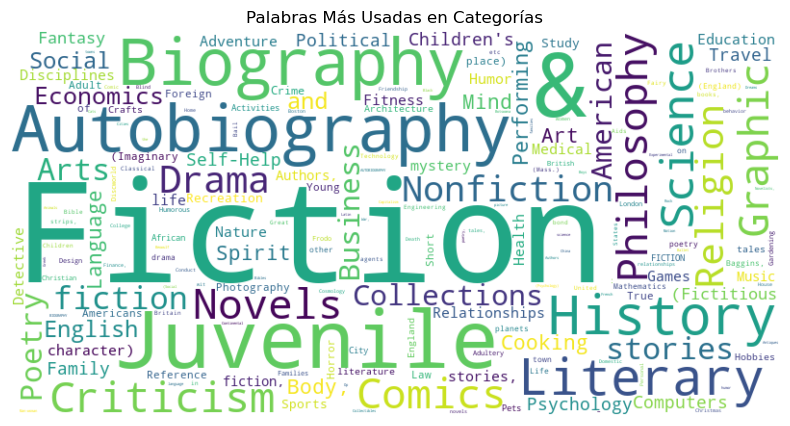

In [24]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

# Gráfico de palabras más usadas: Categorías
all_categories = ' '.join(data['categories'].dropna())
word_counts = Counter(all_categories.split())
wordcloud = WordCloud(width=800, height=400,
                      background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras Más Usadas en Categorías')
plt.show()

### Resumen del Dataset de Libros

El dataset analizado consta de **6,810 entradas**, cada una representa un libro único. Estos están descritos mediante **12 atributos**, que incluyen tanto identificadores numéricos como descriptivos. A continuación se detalla la estructura y las características principales del dataset:

### Variables Categóricas:

### Identificadores de Libro
- `isbn13`: Cada libro tiene un identificador ISBN de 13 dígitos, proporcionado para todos los libros (6810 entradas no nulas).
- `isbn10`: Un identificador ISBN alternativo de 10 dígitos para cada libro, también completamente poblado.

### Títulos y Autores
- `title`: El título del libro, sin entradas nulas en el dataset. Existen 6398 títulos únicos en el dataset, siendo "The Lord of the Rings" el título más frecuente, apareciendo 11 veces.
- `subtitle`: Subtítulos proporcionados para 2,381 libros, sugiriendo que no todos los libros tienen un subtítulo explícito.
- `authors`: Nombres de los autores, presentes para 6,738 libros, indicando una pequeña proporción de entradas sin esta información. Esto podría representar un problema a futuro. Hay 3781 autores únicos, y el autor más frecuente aparece 72 veces.

### Categorización y Descripción
- `categories`: Categorías o géneros bajo los cuales se clasifican los libros, con 6,711 libros categorizados. Hay casi 100 libros no categorizados lo cual podria generar conflictos a la hora de realizar recomendaciones. Se identifican 568 categorías únicas, siendo "Fiction" la más común con 2588 ocurrencias.
- `description`: Descripciones textuales detalladas disponibles para 6,548 libros, proporcionando un contexto valioso sobre el contenido y el tema de cada libro y que podria utilizarce para las recomendaciones a clientes de la biblioteca.

### Aspectos Visuales y Editoriales
- `thumbnail`: URLs de imágenes de portada para 6,481 libros, lo que ayuda en la visualización y el marketing digital del libro. Se testeó valores al azar y se verificó que algunos links estaban caidos. Evaluar la solución para estos casos.

### Variables Numéricas:

- `published_year`: Año de publicación registrado para 6,804 libros, ofreciendo una perspectiva sobre la temporalidad de las publicaciones. Los años de publicación varían entre 95 años distintos, con el año más común siendo 2006 (894 libros publicados en ese año).

### Calificaciones y Popularidad
- `average_rating`: La calificación promedio asignada por los usuarios, disponible para 6,767 libros, lo que refleja la recepción del libro por parte de los lectores. Los valores de calificación varían entre 1 y 5, en promedio se distribuyen en 201 valores únicos, siendo 4.0 la calificación más común con 126 ocurrencias.
- `num_pages`: Número de páginas, también disponible para 6,767 libros, indicando la extensión de los textos. El número de páginas varía en 916 valores únicos, con el valor más frecuente siendo 288 páginas (141 libros).
- `ratings_count`: El número de calificaciones que ha recibido cada libro, también notado para 6,767 libros, que puede ser utilizado para medir la popularidad o el engagement de los lectores. Hay 3882 valores únicos en el conteo de calificaciones, con el valor más común apareciendo 43 veces.

**Uso del Dataset en Relación con los Objetivos del Proyecto**: Este conjunto de datos ofrece una base sólida para varios componentes esenciales del proyecto. *Es ideal para desarrollar un sistema automatizado de recomendación de libros*, tanto basado en contenido como en colaboración, alineándose con el objetivo de optimizar la experiencia del usuario y aumentar su satisfacción. Sin embargo, para respaldar completamente la iniciativa de mejorar la eficiencia en la gestión de recursos y optimizar la utilización de estos, sería beneficioso enriquecer el dataset con datos adicionales sobre las interacciones de los usuarios con la biblioteca, tales como:

 * Registros de préstamos.
 * Frecuencia de uso.
 * Retroalimentación directa de los usuarios.

Esta información adicional permitiría realizar análisis predictivos más precisos sobre tendencias de publicación y demanda de libros, facilitando una mejor alineación con las necesidades e intereses de los usuarios. Además, la integración y automatización de los registros de disponibilidad y estado de préstamo en el dataset podrían reducir significativamente la carga administrativa del personal, apoyando la eficiencia operativa y proporcionando una base de datos más completa sobre la cual tomar decisiones informadas para la gestión de colecciones y la programación de actividades de la biblioteca.

De todas formas, como se mencionó anteriormente el dataset es **suficiente** y presenta datos de **calidad** para una primera iteración en la construcción de un sistema de recomendación.

### CRISP-DM 3. Preparación de los datos:

Dado que uno de los objetivos es implementar un sistema automatizado de recomendación de libros, vemos que en el dataset contamos con los datos necesarios para identificar un libro y recomendarlo a los usuarios de la biblioteca, procedemos a extraer estas variables importantes y procesarlas.

Las variables seleccionadas son:

* `title` (ítulo del libro)
* `authors` (Autor/es del libro)
* `categories` (Categorías del libro)
* `description` (Descripción del libro)
* `published_year` (Año de publicación)

In [8]:
# Obtenemos las variables de interés para el análisis:

variables_seleccionadas = [
    "title",
    "authors",
    "categories",
    "description",
    "published_year",
]

print(data[variables_seleccionadas].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           6810 non-null   object 
 1   authors         6738 non-null   object 
 2   categories      6711 non-null   object 
 3   description     6548 non-null   object 
 4   published_year  6804 non-null   float64
dtypes: float64(1), object(4)
memory usage: 266.1+ KB
None


Antes de construir el sistema de recomendación, debemos preprocesar los datos. Esto incluye limpieza de texto, manejo de valores faltantes y tokenización.

In [9]:
# Revisar si hay valores nulos en las variables seleccionadas y reemplazarlos por un valor por defecto
for feature in variables_seleccionadas:
    data[feature] = data[feature].fillna("")

# Revisar si hay valores nulos en las variables seleccionadas
print(data[variables_seleccionadas].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           6810 non-null   object
 1   authors         6810 non-null   object
 2   categories      6810 non-null   object
 3   description     6810 non-null   object
 4   published_year  6810 non-null   object
dtypes: object(5)
memory usage: 266.1+ KB
None


Ahora que no tenemos valores nulos, combinamos las columnas de interés en una nueva columna llamada `libros`. El sistema de recomendación utilizará esta columna combinada para encontrar similitudes entre los libros de la biblioteca.

In [10]:
# Combinar las columnas de interés en una sola columna
libros = (
    data["title"]
    + " "
    + data["categories"]
    + " "
    + data["authors"]
    + " "
    + f"{data['published_year']}"
)
pd.set_option("display.max_colwidth", None)
libros.head(5)

0                                             Gilead Fiction Marilynne Robinson 0       2004.0\n1       2000.0\n2       1982.0\n3       1993.0\n4       2002.0\n         ...  \n6805    1999.0\n6806    1993.0\n6807    2004.0\n6808    1981.0\n6809    1998.0\nName: published_year, Length: 6810, dtype: object
1    Spider's Web Detective and mystery stories Charles Osborne;Agatha Christie 0       2004.0\n1       2000.0\n2       1982.0\n3       1993.0\n4       2002.0\n         ...  \n6805    1999.0\n6806    1993.0\n6807    2004.0\n6808    1981.0\n6809    1998.0\nName: published_year, Length: 6810, dtype: object
2                            The One Tree American fiction Stephen R. Donaldson 0       2004.0\n1       2000.0\n2       1982.0\n3       1993.0\n4       2002.0\n         ...  \n6805    1999.0\n6806    1993.0\n6807    2004.0\n6808    1981.0\n6809    1998.0\nName: published_year, Length: 6810, dtype: object
3                                         Rage of angels Fiction Sidney Sheldon 0 

### CRISP-DM 4. Modelado:

Para crear el sistema de recomendación basado en contenido, utilizaremos la técnica de **TF-IDF** (Term Frequency-Inverse Document Frequency). Esta técnica se utiliza para convertir texto en vectores numéricos, que luego se pueden utilizar para calcular la similitud entre los textos. TF-IDF otorga más peso a los términos que son importantes en un documento específico y menos peso a los términos comunes.

* Frecuencia de Término (TF): Mide cuántas veces aparece un término en un documento.
* Frecuencia Inversa de Documento (IDF): Mide la importancia de un término en el conjunto de documentos. Los términos comunes que aparecen en muchos documentos reciben un peso menor.

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Crear un vectorizador TF-IDF
vector_tfidf = TfidfVectorizer()

vector_caracteristicas = vector_tfidf.fit_transform(libros)

print(vector_caracteristicas.shape)
print(vector_caracteristicas)

(6810, 10548)
  (0, 6894)	0.06443750710614472
  (0, 2840)	0.06443750710614472
  (0, 143)	0.06443750710614472
  (0, 5557)	0.06443750710614472
  (0, 7629)	0.06443750710614472
  (0, 6655)	0.06443750710614472
  (0, 102)	0.06443750710614472
  (0, 142)	0.06443750710614472
  (0, 91)	0.06443750710614472
  (0, 141)	0.06443750710614472
  (0, 140)	0.06443750710614472
  (0, 139)	0.06443750710614472
  (0, 103)	0.06443750710614472
  (0, 138)	0.06443750710614472
  (0, 110)	0.06443750710614472
  (0, 98)	0.12887501421228945
  (0, 92)	0.06443750710614472
  (0, 108)	0.06443750710614472
  (0, 112)	0.12887501421228945
  (0, 8035)	0.43700046813706117
  (0, 6013)	0.5885172279797457
  (0, 3422)	0.11189605685054443
  (0, 3882)	0.5885172279797457
  (1, 1822)	0.3013956698681646
  (1, 267)	0.30498953565603815
  :	:
  (6809, 10330)	0.33175135989257093
  (6809, 2240)	0.2206043839379868
  (6809, 9492)	0.30218650531542857
  (6809, 10435)	0.26439634843355025
  (6809, 5684)	0.20438577371569946
  (6809, 9065)	0.21319651

**Similitud del Coseno**(Cosine Similarity): La similaridad de coseno es una métrica que se utiliza para medir cuán similares son dos vectores. Se calcula como el coseno del ángulo entre dos vectores en un espacio multidimensional. En términos de recomendación de contenido, esto nos ayuda a medir cuán similares son dos libros en función de sus características textuales vectorizadas.Se calcula tomando el coseno del ángulo entre dos vectores no nulos y su valor oscila entre -1 y 1, donde:

* Un valor de 1 indica que los vectores son idénticos.
* Un valor de 0 indica que los vectores son ortogonales (no tienen similitudes).
* Un valor de -1 indica que los vectores son diametralmente opuestos.
* La diagonal principal de la matriz siempre estará compuesta por unos (1,1,1,...,1), ya que cada libro es idéntico a sí mismo.

En la función cosine_similarity() pasamos el `vector_caracteristicas` dos veces indicando que estamos calculando la similaridad de cada libro con todos los demás libros (incluido él mismo) para generar una matriz de similaridad. En esta matriz, la entrada [i, j] representa la similaridad entre el libro i y el libro j

Ejemplo Visual: Si tenemos tres libros (A, B, C), la matriz de similaridad resultante tendría este aspecto:

        A    B    C
    A  1.0  0.8  0.3
    B  0.8  1.0  0.5
    C  0.3  0.5  1.0

Aquí, cada celda [i, j] representa la similaridad entre el libro i y el libro j, donde el valor de 1.0 en la diagonal indica que un libro es completamente similar a sí mismo.


In [12]:
from sklearn.metrics.pairwise import cosine_similarity

# Obtener la similitud coseno entre los vectores de características:
similitud = cosine_similarity(vector_caracteristicas, vector_caracteristicas)

print(similitud)

[[1.         0.08005311 0.11641123 ... 0.08492469 0.08320896 0.07576596]
 [0.08005311 1.         0.08011208 ... 0.06549297 0.06416982 0.10645452]
 [0.11641123 0.08011208 1.         ... 0.08498725 0.09570742 0.07582177]
 ...
 [0.08492469 0.06549297 0.08498725 ... 1.         0.06807484 0.06198557]
 [0.08320896 0.06416982 0.09570742 ... 0.06807484 1.         0.06073329]
 [0.07576596 0.10645452 0.07582177 ... 0.06198557 0.06073329 1.        ]]


### CRISP-DM 5. Evaluación:

En esta fase, evaluaremos la efectividad del sistema de recomendación. Este paso implica probar el sistema con ejemplos concretos y verificar si las recomendaciones son relevantes.

Pasos a seguir:

* Crear una lista con todos los títulos de libros en el dataset.
* Obtener el nombre del libro del usuario.
* Encontrar la coincidencia más cercana para el nombre del libro dado por el usuario.
* Encontrar el índice del libro con el título coincidente.
* Obtener una lista de libros similares basados en el puntaje de similitud.
* Ordenar los libros basados en su puntaje de similitud.
* Imprimir los nombres de libros similares basados en el índice.

In [13]:
# Crear una lista con todos los títulos de libros en el dataset
titulos = data["title"].tolist()
print(titulos)

['Gilead', "Spider's Web", 'The One Tree', 'Rage of angels', 'The Four Loves', 'The Problem of Pain', 'An Autobiography', 'Empires of the Monsoon', 'The Gap Into Madness', 'Master of the Game', 'If Tomorrow Comes', "Assassin's Apprentice", 'Warhost of Vastmark', 'The Once and Future King', 'Murder in LaMut', 'Jimmy the Hand', 'Well of Darkness', 'Witness for the Prosecution & Selected Plays', 'The Little House', 'Mystical Paths', 'Glittering Images', 'Glamorous Powers', 'The Mad Ship', 'Post Captain', 'The Reverse of the Medal', 'Miss Marple', 'The Years of Rice and Salt', 'Spares', 'Gravity', 'The Wise Woman', "Girls' Night in", 'The White Album', "The Bonesetter's Daughter", 'The Lexus and the Olive Tree', "'Tis", 'Ocean Star Express', 'A Small Pinch of Weather', 'The Princess of the Chalet School', 'Koko', 'Tree and Leaf', 'Partners in Crime', 'Murder in Mesopotamia', 'The Lord of the Rings, the Return of the King', 'All Families are Psychotic', 'Death in the Clouds', 'Appointment w

In [14]:
# Obtener el nombre del libro del usuario.
def obtener_libro_usuario():
    libro_usuario = input("Ingrese el título de un libro: ")
    return libro_usuario

Para encontrar las coincidencias usamos la librerías difflib, esta proporciona clases y funciones para comparar secuencias, y es particularmente útil para tareas de procesamiento de texto y análisis de diferencias. En este caso, usamos la función get_close_matches() para encontrar las coincidencias más cercanas al título del libro dado por el usuario.

In [15]:
from difflib import get_close_matches

# Primero obtenemos el nombre del libro del usuario:
libro_usuario = obtener_libro_usuario()


# Función para encontrar la coincidencia más cercana al libro ingresado por el usuario.
def encontrar_coincidencia(titulo_ingresado):
    return get_close_matches(titulo_ingresado, titulos)


coincidencia = encontrar_coincidencia(libro_usuario)

print(coincidencia)

['Dracula', 'Dracula', 'Dracula']


In [16]:
# Verificar si hay coincidencias
if coincidencia:
    # Encontrar el índice del libro con el título coincidente.
    coincidencia_index = coincidencia[0]
    try:
        indice_libro = data[data["title"] == coincidencia_index].index[0]

        # Obtener una lista de libros similares basados en el puntaje de similitud.
        puntaje_similitud = list(enumerate(similitud[indice_libro]))
        print(puntaje_similitud)
    except IndexError:
        print("Error: No se encontró el índice del libro.")
else:
    print("No se encontraron coincidencias para el título proporcionado.")

[(0, 0.06940174955517588), (1, 0.05352185441007998), (2, 0.06945287619558656), (3, 0.06451217578843185), (4, 0.057282434778645974), (5, 0.05327991035875435), (6, 0.0711744770317461), (7, 0.05356250482970559), (8, 0.18914509718253625), (9, 0.06037323008090995), (10, 0.054293973540840076), (11, 0.06133529279556172), (12, 0.0600578538857701), (13, 0.04750367949806789), (14, 0.04993946491250528), (15, 0.05850101422076297), (16, 0.06029642849632127), (17, 0.0515103277904796), (18, 0.06540696090109199), (19, 0.059998786162562136), (20, 0.059544215912171565), (21, 0.05716467417159121), (22, 0.060344681324006465), (23, 0.20972774927581997), (24, 0.05798835286921798), (25, 0.05582272140975911), (26, 0.05256297870657384), (27, 0.05475001966357443), (28, 0.07112178039603335), (29, 0.05915755744741476), (30, 0.048939074376327996), (31, 0.05787594566923228), (32, 0.058780915536352236), (33, 0.051962088713156204), (34, 0.06346227303767728), (35, 0.05179961575818634), (36, 0.05111412642487227), (37, 

In [17]:
# Obtener una lista de libros similares basados en el puntaje de similitud.
puntaje_similitud = list(enumerate(similitud[indice_libro]))
# print(puntaje_similitud)

In [18]:
# Ordenar los libros basados en su puntaje de similitud.
libros_similares_ordenados = sorted(
    puntaje_similitud, key=lambda x: x[1], reverse=True)
print(libros_similares_ordenados)

[(859, 1.0000000000000002), (2447, 0.7961758733666621), (4443, 0.7961758733666621), (4933, 0.6077556185533894), (4946, 0.4584548910996259), (5865, 0.39170626302840605), (2501, 0.28880682930055107), (5892, 0.28464238074444725), (2836, 0.2678835540968578), (3184, 0.24811569160598562), (4290, 0.2464113066381569), (80, 0.23462008901905634), (58, 0.23460600525362277), (871, 0.23066638219320124), (4291, 0.22349060739514526), (2555, 0.22003996432800887), (6591, 0.2162359901201435), (1741, 0.21016201128821238), (23, 0.20972774927581997), (57, 0.20967592778793415), (5622, 0.20899282583244494), (6565, 0.20582806717452762), (40, 0.20477673894503065), (1735, 0.20400582253952143), (4573, 0.19993388192419945), (4570, 0.19778976400579576), (4572, 0.19407112102136007), (3711, 0.19296363216805293), (46, 0.19022096671076644), (4539, 0.18957128935572448), (8, 0.18914509718253625), (65, 0.1869393918289997), (4456, 0.18646434280854324), (4596, 0.1863603508055093), (1335, 0.1843630999959195), (875, 0.183725

In [19]:
# Elejimos los primeros n libros más similares al libro ingresado por el usuario.
n_libros_similares = 10

top_n_libros = libros_similares_ordenados[1: n_libros_similares + 1]

top_n_libros

[(2447, 0.7961758733666621),
 (4443, 0.7961758733666621),
 (4933, 0.6077556185533894),
 (4946, 0.4584548910996259),
 (5865, 0.39170626302840605),
 (2501, 0.28880682930055107),
 (5892, 0.28464238074444725),
 (2836, 0.2678835540968578),
 (3184, 0.24811569160598562),
 (4290, 0.2464113066381569)]

In [20]:
# Impresión de los libros recomendados basados en el indice de los libros.

i = 1

print(f"Libro seleccionado por el usuario: {libro_usuario}\n")


print(f"Libros similares sugeridos por el sistema:\n")
for libro in libros_similares_ordenados:
    indice_libro = libro[0]
    titulo_indice = data[data.index == indice_libro]["title"].values[0]
    if i < n_libros_similares + 1:
        print(f"Libro {i}: {titulo_indice}")
        i += 1

Libro seleccionado por el usuario: dracula

Libros similares sugeridos por el sistema:

Libro 1: Dracula
Libro 2: Dracula
Libro 3: Dracula
Libro 4: Bram Stoker's Dracula
Libro 5: The Bram Stoker Bedside Companion
Libro 6: A Dracula Handbook
Libro 7: In Search of Dracula
Libro 8: Happy Hour at Casa Dracula
Libro 9: Count Zero
Libro 10: Best Ghost and Horror Stories


Para **evaluar** si la lista de libros recomendados es similar al libro ingresado y mostrar un porcentaje de similitud en cada ítem, vamos a calcular y mostrar el puntaje de similitud de cada libro recomendado en relación con el libro ingresado. Entonces vamos a:

- Calcular la Similitus del Coseno entre el libro ingresado y los libros recomendados.
- Agregar a la lista el porcentaje de similitud de cada libro recomendado en relación con el libro ingresado.
- Mostrar los libros recomendados ordenados por similitud.

A continuación la **Nueva Implementación** del sistema de recomendación de libros:

Nota: En esta función se agrega la variable subtitulo a la descripción del libro para mejorar la similitud entre los libros y retorna una lista para manipular posteriormente en el despliegue.Se controlaron posibilidades de que no encuentre coincidencias y se agregaron mensajes de error.

In [21]:
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Carga
url = "https://raw.githubusercontent.com/sosarodrigox/grupo13_pp2/main/data/data.csv"
data = pd.read_csv(url)

# Preprocesamiento
data.fillna("", inplace=True)
libros = (
    data["title"]
    + " "
    + data["subtitle"]
    + " "
    + data["categories"]
    + " "
    + data["authors"]
    + " "
    + data["published_year"].astype(str)
)

# Vectorización TF-IDF
vector_tfidf = TfidfVectorizer()
vector_caracteristicas = vector_tfidf.fit_transform(libros)

# Cálculo similitud de coseno
similitud = cosine_similarity(vector_caracteristicas, vector_caracteristicas)


def recomendar_libros(nombre_libro):
    print(f"Libro seleccionado por el usuario: {nombre_libro}")
    lista_titulos_completa = data["title"].tolist()
    encontrar_cercanos = difflib.get_close_matches(
        nombre_libro, lista_titulos_completa)

    if encontrar_cercanos:
        cercanos = encontrar_cercanos[0]
        indice_de_libro = data[data.title == cercanos].index[0]
        puntaje_similitud = list(enumerate(similitud[indice_de_libro]))
        libros_similares_ordenados = sorted(
            puntaje_similitud, key=lambda x: x[1], reverse=True
        )

        # Lista de diccionarios con los libros recomendados y su similitud
        recomendaciones = []
        # Muestra los 10 primeros
        for i, (index, score) in enumerate(libros_similares_ordenados[1:11], 1):
            libro = {
                "Indice": i,
                "Titulo": data.iloc[index]["title"],
                "Autor": data.iloc[index]["authors"],
                "Año": data.iloc[index]["published_year"],
                "Categoria": data.iloc[index]["categories"],
                "Similitud": f"{score * 100:.2f}%",
            }
            recomendaciones.append(libro)

        # Convertir a un DataFrame
        df_recomendaciones = pd.DataFrame(recomendaciones)
        return df_recomendaciones

    else:
        print("No se encontró ninguna coincidencia para el libro ingresado.")
        return pd.DataFrame()  # DataFrame vacío si no hay coincidencias


# Prueba
libro_usuario = input("Ingrese el nombre de su libro favorito: ")
df_recomendaciones = recomendar_libros(libro_usuario)
display(df_recomendaciones)

/var/folders/kf/yg24jn117tsddk3h_24784nr0000gp/T/ipykernel_5363/129135118.py:11: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



Libro seleccionado por el usuario: dracula


,Indice,Titulo,Autor,Año,Categoria,Similitud
0,1,Dracula,Bram Stoker,2003.0,Fiction,74.80%
1,2,Bram Stoker's Dracula,Harold Bloom,2003.0,Juvenile Nonfiction,56.28%
2,3,The Bram Stoker Bedside Companion,Bram Stoker,1973.0,Fiction,53.00%
3,4,In Search of Dracula,Raymond T. McNally;Radu Florescu,1994.0,Biography & Autobiography,40.59%
4,5,Dracula,Bram Stoker,1997.0,Fiction,37.95%
5,6,A Dracula Handbook,Elizabeth Miller,2005.0,Education,32.84%
6,7,Happy Hour at Casa Dracula,Marta Acosta,2006.0,Fiction,23.41%
7,8,Best Ghost and Horror Stories,Bram Stoker;Richard Dalby;Stefan R. Dziemianowicz;S. T. Joshi,1997.0,Fiction,21.47%
8,9,Count Zero,William Gibson,2006.0,Fiction,19.47%
9,10,The Lord of the Rings,,2002.0,"Baggins, Frodo (Fictitious character)",19.40%


### CRISP-DM 6. Despliegue:

# CONCLUSIONES DEL PROYECTO

## Proyecto de Recomendación de Libros basado en IA
Nuestro proyecto de recomendación de libros puede considerarse un proyecto de inteligencia artificial debido a las técnicas y algoritmos que emplea para procesar, analizar y recomendar libros basados en similitudes textuales. A continuación, detallamos las técnicas de IA utilizadas y cómo se relacionan con nuestro proyecto.

### * Procesamiento de Lenguaje Natural (NLP) 
El Procesamiento de Lenguaje Natural es un campo de la inteligencia artificial que se ocupa de la interacción entre las computadoras y el lenguaje humano. En nuestro proyecto, utilizamos técnicas de NLP para analizar y vectorizar el texto de los títulos, categorías, autores y años de publicación de los libros.

#### Técnicas y Algoritmos Utilizados:
- **TF-IDF (Term Frequency-Inverse Document Frequency)**:
  - **¿Qué es?**: TF-IDF es una técnica de NLP que se utiliza para convertir el texto en una representación numérica (vectores) que refleja la importancia de una palabra en un documento y en el corpus total.
  - **¿Por qué es IA?**: TF-IDF ayuda a identificar y ponderar las palabras más relevantes en un conjunto de documentos, facilitando así el análisis y la comparación de textos. Es una técnica fundamental en el procesamiento de lenguaje natural.

### * Algoritmos de Similitud y Medición de Distancia
Los algoritmos de similitud y medición de distancia son esenciales en IA para comparar y encontrar similitudes entre diferentes elementos.

#### Técnicas y Algoritmos Utilizados:
- **Similitud del Coseno (Cosine Similarity)**:
- **¿Qué es?**: La similitud del coseno mide la similitud entre dos vectores calculando el coseno del ángulo entre ellos. Es una medida de similitud muy utilizada en NLP.
- **¿Por qué es IA?**: Este algoritmo permite comparar documentos o textos en un espacio vectorial, ayudando a identificar documentos similares. Es ampliamente utilizado en motores de recomendación y búsqueda.

### * Sistema de Recomendación
Los sistemas de recomendación son una aplicación directa de la IA, diseñados para predecir la preferencia de un usuario por un ítem basado en información disponible.

#### Técnicas y Algoritmos Utilizados:
- **Filtrado Basado en Contenido (Content-Based Filtering)**:
- **¿Qué es?**: El filtrado basado en contenido recomienda ítems (en este caso, libros) que son similares a otros ítems que el usuario ha mostrado interés.
- **¿Por qué es IA?**: Este método utiliza modelos y algoritmos de IA para analizar las características de los ítems y encontrar similitudes, proporcionando recomendaciones personalizadas.

Finalizamos observando que nuestro proyecto de recomendación de libros emplea varias técnicas y algoritmos que se consideran parte del campo de la inteligencia artificial:

- **TF-IDF para vectorización de texto** (una técnica de NLP).
- **Similitud del Coseno para medir similitud entre textos**.
- **Sistema de recomendación basado en contenido** para proporcionar recomendaciones de libros.

Estas técnicas permiten analizar y comparar grandes volúmenes de texto de manera eficiente, identificar patrones y similitudes, y proporcionar recomendaciones personalizadas, lo que hace que nuestro proyecto sea un claro ejemplo de una aplicación de inteligencia artificial.
